<a href="https://www.kaggle.com/code/aleksandergalkov/fifa-qatar-2022-research?scriptVersionId=117029989" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#sns.set(rc = {'figure.figsize':(15,7)})

/kaggle/input/qatar-2022-fifa-world-cup-attendance/Attendance Sheet.csv


**STEP 1**

*Reading data*

In [2]:
df = pd.read_csv('/kaggle/input/qatar-2022-fifa-world-cup-attendance/Attendance Sheet.csv')

**STEP 2**

*Exploring data*

In [3]:
df.shape

(64, 6)

In [4]:
df.head()

,Date,Time,Home,Away,Attendance,Venue
0,20 November 2022,19:00 (21:30),Qatar,Ecuador,"67,372",Al Bayt Stadium
1,21 November 2022,16:00 (18:30),England,Iran,"45,334",Khalifa International Stadium
2,21 November 2022,19:00 (21:30),Senegal,Netherlands,"41,721",Al Thumama Stadium
3,21 November 2022,22:00 (00:30),USA,Wales,"43,418",Ahmed bin Ali Stadium
4,22 November 2022,13:00 (15:30),Argentina,Saudi Arabia,"88,012",Lusail Iconic Stadium


In [5]:
df.describe()

,Date,Time,Home,Away,Attendance,Venue
count,64,64,64,64,64,64
unique,23,5,32,34,60,9
top,01 December 2022,22:00 (00:30),Argentina,Morocco,"88,966",Lusail Iconic Stadium
freq,4,24,5,4,3,10


In [6]:
df.dtypes

Date          object
Time          object
Home          object
Away          object
Attendance    object
Venue         object
dtype: object

**STEP 3**

*Fix our data*

In [7]:
# df.Date = pd.to_datetime(df.Date)

In [8]:
df.Attendance = df.Attendance.str.replace(',','.')

In [9]:
new_df = df.Time.str.split(' ',expand=True)
new_df.head()

,0,1
0,19:00,(21:30)
1,16:00,(18:30)
2,19:00,(21:30)
3,22:00,(00:30)
4,13:00,(15:30)


In [10]:
new_df.columns=['time_start','time_finish']
new_df

,time_start,time_finish
0,19:00,(21:30)
1,16:00,(18:30)
2,19:00,(21:30)
3,22:00,(00:30)
4,13:00,(15:30)
...,...,...
59,22:00,(00:30)
60,22:00,(00:30)
61,22:00,(00:30)
62,18:00,(20:30)


In [11]:
new_df.time_finish = new_df.time_finish.str.replace("(","")
new_df.time_finish = new_df.time_finish.str.replace(")","")
new_df.time_finish

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0     21:30
1     18:30
2     21:30
3     00:30
4     15:30
      ...  
59    00:30
60    00:30
61    00:30
62    20:30
63    20:30
Name: time_finish, Length: 64, dtype: object

In [12]:
new_df.head()

,time_start,time_finish
0,19:00,21:30
1,16:00,18:30
2,19:00,21:30
3,22:00,00:30
4,13:00,15:30


In [13]:
final_df = pd.concat([df,new_df],axis=1)
final_df

,Date,Time,Home,Away,Attendance,Venue,time_start,time_finish
0,20 November 2022,19:00 (21:30),Qatar,Ecuador,67.372,Al Bayt Stadium,19:00,21:30
1,21 November 2022,16:00 (18:30),England,Iran,45.334,Khalifa International Stadium,16:00,18:30
2,21 November 2022,19:00 (21:30),Senegal,Netherlands,41.721,Al Thumama Stadium,19:00,21:30
3,21 November 2022,22:00 (00:30),USA,Wales,43.418,Ahmed bin Ali Stadium,22:00,00:30
4,22 November 2022,13:00 (15:30),Argentina,Saudi Arabia,88.012,Lusail Iconic Stadium,13:00,15:30
...,...,...,...,...,...,...,...,...
59,10 December 2022,22:00 (00:30),England,France,68.895,Al Bayt Stadium,22:00,00:30
60,13 December 2022,22:00 (00:30),Argentina,Croatia,88.966,Lusail Iconic Stadium,22:00,00:30
61,14 December 2022,22:00 (00:30),France,Morocco,68.294,Al Bayt Stadium,22:00,00:30
62,17 December 2022,18:00 (20:30),Croatia,Morocco,44.137,Khalifa International Stadium,18:00,20:30


In [14]:
final_df.dtypes

Date           object
Time           object
Home           object
Away           object
Attendance     object
Venue          object
time_start     object
time_finish    object
dtype: object

In [15]:
final_df['start_time'] = final_df['Date'] + " " + final_df['time_start']
final_df['end_time'] = final_df['Date'] + " " + final_df['time_finish']


final_df.head()

,Date,Time,Home,Away,Attendance,Venue,time_start,time_finish,start_time,end_time
0,20 November 2022,19:00 (21:30),Qatar,Ecuador,67.372,Al Bayt Stadium,19:00,21:30,20 November 2022 19:00,20 November 2022 21:30
1,21 November 2022,16:00 (18:30),England,Iran,45.334,Khalifa International Stadium,16:00,18:30,21 November 2022 16:00,21 November 2022 18:30
2,21 November 2022,19:00 (21:30),Senegal,Netherlands,41.721,Al Thumama Stadium,19:00,21:30,21 November 2022 19:00,21 November 2022 21:30
3,21 November 2022,22:00 (00:30),USA,Wales,43.418,Ahmed bin Ali Stadium,22:00,00:30,21 November 2022 22:00,21 November 2022 00:30
4,22 November 2022,13:00 (15:30),Argentina,Saudi Arabia,88.012,Lusail Iconic Stadium,13:00,15:30,22 November 2022 13:00,22 November 2022 15:30


In [16]:
final_df.columns

Index(['Date', 'Time', 'Home', 'Away', 'Attendance', 'Venue', 'time_start',
       'time_finish', 'start_time', 'end_time'],
      dtype='object')

In [17]:
final_df = final_df[['start_time', 'end_time', 'Home', 'Away', 'Attendance', 'Venue']]
final_df = final_df \
    .rename(columns={"Home":"home","Away":"away","Attendance":"attendance", "Venue":"stadium"})
final_df

,start_time,end_time,home,away,attendance,stadium
0,20 November 2022 19:00,20 November 2022 21:30,Qatar,Ecuador,67.372,Al Bayt Stadium
1,21 November 2022 16:00,21 November 2022 18:30,England,Iran,45.334,Khalifa International Stadium
2,21 November 2022 19:00,21 November 2022 21:30,Senegal,Netherlands,41.721,Al Thumama Stadium
3,21 November 2022 22:00,21 November 2022 00:30,USA,Wales,43.418,Ahmed bin Ali Stadium
4,22 November 2022 13:00,22 November 2022 15:30,Argentina,Saudi Arabia,88.012,Lusail Iconic Stadium
...,...,...,...,...,...,...
59,10 December 2022 22:00,10 December 2022 00:30,England,France,68.895,Al Bayt Stadium
60,13 December 2022 22:00,13 December 2022 00:30,Argentina,Croatia,88.966,Lusail Iconic Stadium
61,14 December 2022 22:00,14 December 2022 00:30,France,Morocco,68.294,Al Bayt Stadium
62,17 December 2022 18:00,17 December 2022 20:30,Croatia,Morocco,44.137,Khalifa International Stadium


In [18]:
final_df.dtypes

start_time    object
end_time      object
home          object
away          object
attendance    object
stadium       object
dtype: object

In [19]:
final_df['start_time'] = pd.to_datetime(final_df.start_time)
final_df['end_time'] = pd.to_datetime(final_df.end_time)
final_df['date'] = final_df.start_time.dt.date
final_df['beginning_time'] = final_df.start_time.dt.strftime('%H:%M')

In [20]:
final_df['attendance'] = pd.to_numeric(final_df.attendance)

In [21]:
final_df.dtypes

start_time        datetime64[ns]
end_time          datetime64[ns]
home                      object
away                      object
attendance               float64
stadium                   object
date                      object
beginning_time            object
dtype: object

In [22]:
final_df.drop_duplicates()

,start_time,end_time,home,away,attendance,stadium,date,beginning_time
0,2022-11-20 19:00:00,2022-11-20 21:30:00,Qatar,Ecuador,67.372,Al Bayt Stadium,2022-11-20,19:00
1,2022-11-21 16:00:00,2022-11-21 18:30:00,England,Iran,45.334,Khalifa International Stadium,2022-11-21,16:00
2,2022-11-21 19:00:00,2022-11-21 21:30:00,Senegal,Netherlands,41.721,Al Thumama Stadium,2022-11-21,19:00
3,2022-11-21 22:00:00,2022-11-21 00:30:00,USA,Wales,43.418,Ahmed bin Ali Stadium,2022-11-21,22:00
4,2022-11-22 13:00:00,2022-11-22 15:30:00,Argentina,Saudi Arabia,88.012,Lusail Iconic Stadium,2022-11-22,13:00
...,...,...,...,...,...,...,...,...
59,2022-12-10 22:00:00,2022-12-10 00:30:00,England,France,68.895,Al Bayt Stadium,2022-12-10,22:00
60,2022-12-13 22:00:00,2022-12-13 00:30:00,Argentina,Croatia,88.966,Lusail Iconic Stadium,2022-12-13,22:00
61,2022-12-14 22:00:00,2022-12-14 00:30:00,France,Morocco,68.294,Al Bayt Stadium,2022-12-14,22:00
62,2022-12-17 18:00:00,2022-12-17 20:30:00,Croatia,Morocco,44.137,Khalifa International Stadium,2022-12-17,18:00


**STEP 4**

*Let's explore our data*

We can start with attendance research

In [23]:
final_df.attendance.sum()

3404.252

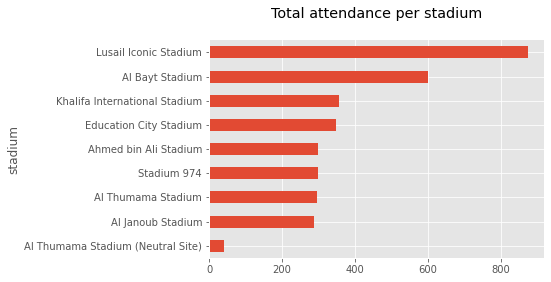

In [24]:
final_df \
    .groupby('stadium') \
    .agg({"attendance":"sum"}) \
    .rename(columns={"attendance":"total attendance"}) \
    .reset_index() \
    .sort_values(by = 'total attendance') \
    .plot(kind='barh',title ='Total attendance per stadium\n',x='stadium', legend=False)

sns.despine()

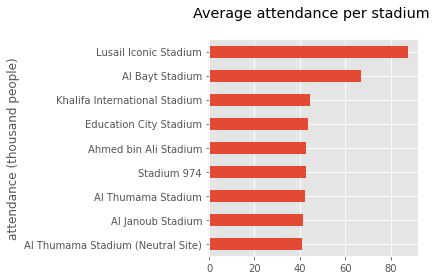

In [25]:
final_df \
    .groupby('stadium') \
    .agg({"attendance":"mean"}) \
    .rename(columns={"attendance":"average attendance"}) \
    .reset_index() \
    .sort_values(by = 'average attendance') \
    .plot(kind='barh',title ='Average attendance per stadium \n',x = 'stadium',xlabel='attendance (thousand people)',legend=False )
plt.tight_layout()
sns.despine()

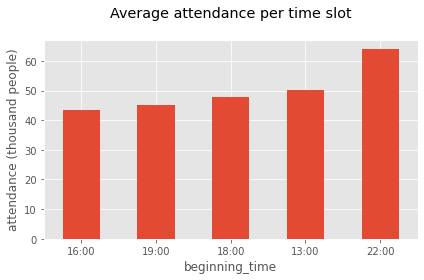

In [26]:
final_df \
    .groupby('beginning_time') \
    .agg({"attendance":"mean"}) \
    .rename(columns={"attendance":"average attendance"}) \
    .reset_index() \
    .sort_values(by = 'average attendance') \
    .plot(kind='bar',title ='Average attendance per time slot\n',x = 'beginning_time',ylabel='attendance (thousand people)', legend=False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

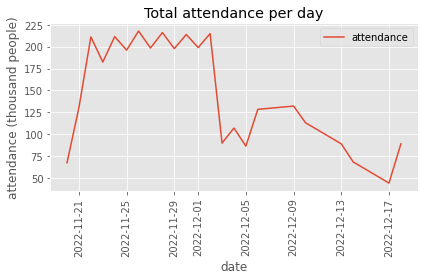

In [27]:
final_df \
    .groupby('date') \
    .agg({"attendance":"sum"}) \
    .reset_index() \
    .plot(kind='line',title ='Total attendance per day',x = 'date',ylabel='attendance (thousand people)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

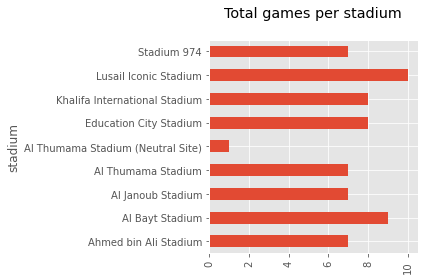

In [28]:
final_df \
    .groupby('stadium') \
    .agg({"attendance":"count"}) \
    .rename(columns={"attendance":"total games"}) \
    .reset_index() \
    .plot(kind='barh',title ='Total games per stadium\n',x = 'stadium', legend=False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

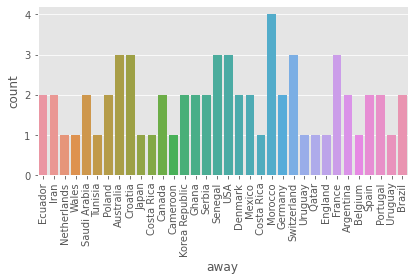

In [29]:
sns.countplot(x = final_df.away)
plt.xticks(rotation=90)
plt.tight_layout()

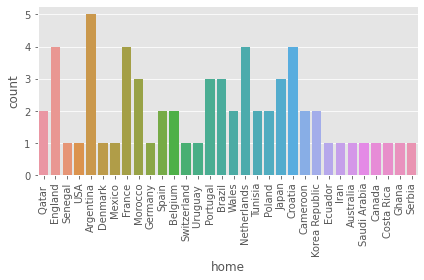

In [30]:
sns.countplot(x = final_df.home)
plt.xticks(rotation=90)
plt.tight_layout()

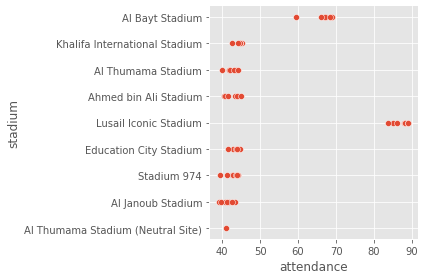

In [31]:
sns.scatterplot(data=final_df, x = 'attendance', y = 'stadium')
plt.tight_layout()
sns.despine()

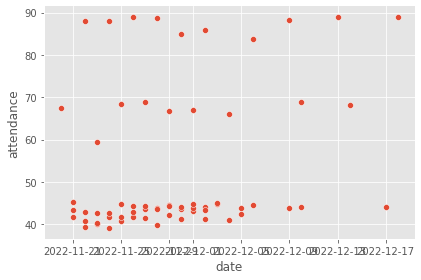

In [32]:
sns.scatterplot(data=final_df, x = 'date', y = 'attendance')
plt.tight_layout()
sns.despine()

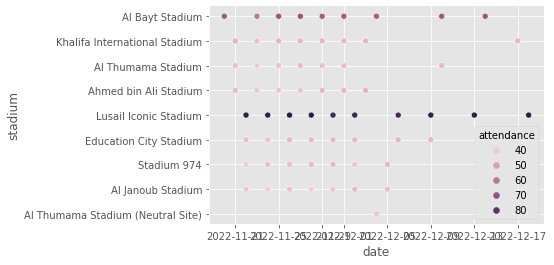

In [33]:
sns.scatterplot(data=final_df, x = 'date', y = 'stadium', hue='attendance')
sns.despine()

In [34]:
final_df.head()

,start_time,end_time,home,away,attendance,stadium,date,beginning_time
0,2022-11-20 19:00:00,2022-11-20 21:30:00,Qatar,Ecuador,67.372,Al Bayt Stadium,2022-11-20,19:00
1,2022-11-21 16:00:00,2022-11-21 18:30:00,England,Iran,45.334,Khalifa International Stadium,2022-11-21,16:00
2,2022-11-21 19:00:00,2022-11-21 21:30:00,Senegal,Netherlands,41.721,Al Thumama Stadium,2022-11-21,19:00
3,2022-11-21 22:00:00,2022-11-21 00:30:00,USA,Wales,43.418,Ahmed bin Ali Stadium,2022-11-21,22:00
4,2022-11-22 13:00:00,2022-11-22 15:30:00,Argentina,Saudi Arabia,88.012,Lusail Iconic Stadium,2022-11-22,13:00


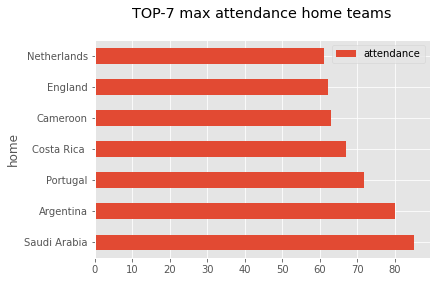

In [35]:
home_att = final_df \
    .groupby('home') \
    .agg({"attendance":"mean"}) \
    .sort_values(by = 'attendance',ascending=False)
home_att.head(7).plot(kind='barh',title='TOP-7 max attendance home teams\n')
plt.show()